<a href="https://colab.research.google.com/github/Aldistwn29/Analisis-Churn-Customer/blob/main/Analisis_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Konteks permasalahan:** <br>
Sebuah perusahaan telkomunikasi memiliki permaslahan dalam hal penjualan, seorang menajer memerintahkan seorang data analyst untuk menganlisis dataset customer-churn untuk menghasilkan insight dari dataset tersebut, sehingga meningkatkan penjualan perusahaan.

**Tahapan Analisis**: <br>
1. Analisis data pelanggan: Jelajahi dan pahami pola dan hubungan dalam kumpulan data telokomunikasi yang di sedikan.
2. Mengindentifikasikan faktor utama penyebab churn: tentukan fitur yang paling berpengaruh yang menyebabkan churn pelanggan.
3. Mengembangkan model prediktif: membangun model pembelajaran untuk memprediksi churn customer.
4. Berikan insight: Tawarkan wawasan yang dapat membantu perusahaan dalam mengambil keputusan tindakan pro-aktif untuk mempertahankan pelanggan

In [76]:
# Import Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRFClassifier

In [77]:
# Memanggil dataset
df = pd.read_csv('/content/telco-churn-customers.csv')

In [78]:
# Melihat 10 data awal
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Melihat 10 baris dataset terakhir
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
# bagaimana type datanya?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Bagaimana volume datanya?
print(f"Jumlah baris: {df.shape[0]}")
print(f"Kumlah kolom: {df.shape[1]}")

Jumlah baris: 7043
Kumlah kolom: 21


In [8]:
# Summary Statistika
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe(exclude=np.number)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# Data Formating

In [79]:
df = df.drop(columns='customerID', axis=1)

In [80]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [81]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0.0')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

# Heandling Missing Data dan Duplicates

In [82]:
print("Nilai duplicated:",df.duplicated().sum())

Nilai duplicated: 22


In [83]:
# Menghapus data duplicated
df.drop_duplicates(inplace=True)

In [84]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [85]:
# Bagaimana dimensi datasnya sekarang
print(f"Number of row: {df.shape[0]},\nNumber of Columns: {df.shape[1]}")

Number of row: 7021,
Number of Columns: 20


# Exploratory data analysis

<ipython-input-86-0040d90f2204>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


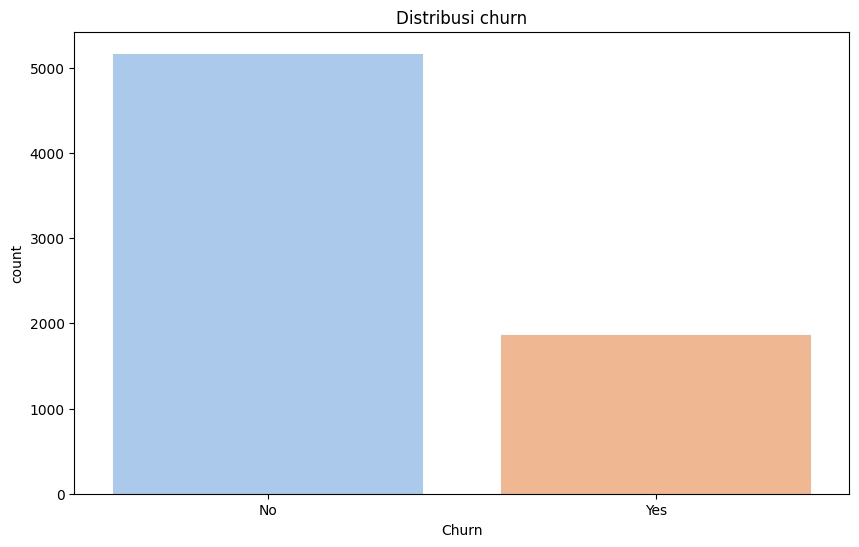

In [86]:
# Bagaimana distribusi churnnya
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribusi churn')
plt.show()

Dari proposisi customer churn di atas, lebih dari 1000 customer yang churn(tidak belanggan lagi).

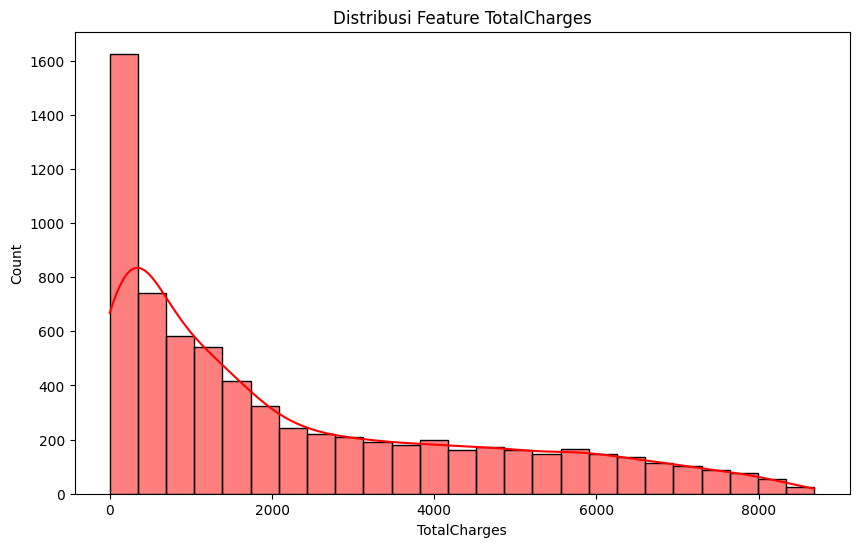

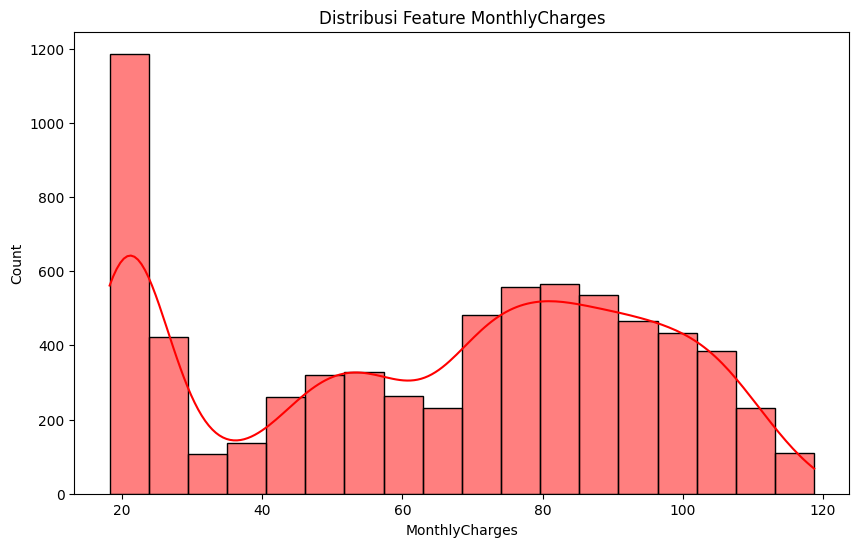

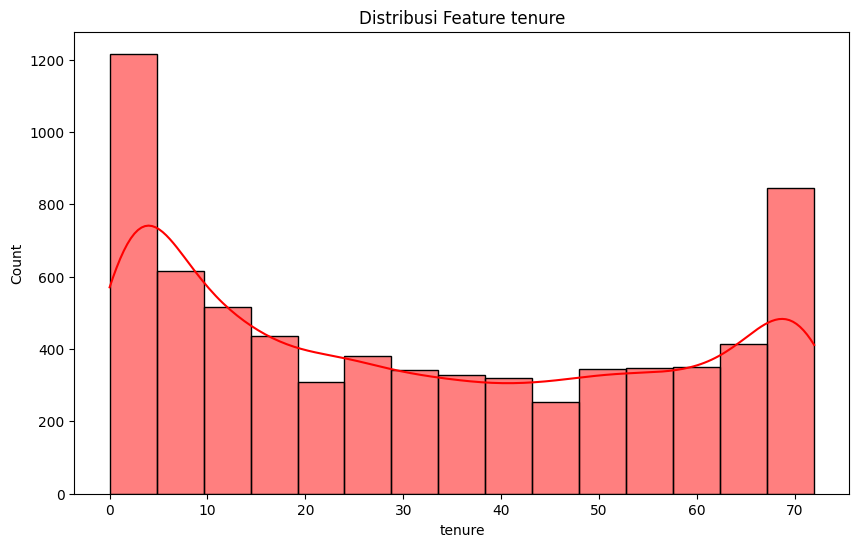

In [87]:
# bagaimana distribusi dari feature numeric
for col in ['TotalCharges', 'MonthlyCharges', 'tenure']:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], kde=True, color='red')
  plt.title(f"Distribusi Feature {col}")
  plt.show()

Interperetasi: <br>
**Untuk histplot TotalChanges:** <br>
Distribusi TotalCharge bersifat positively skewed(miring ke kanan) <br>
Kebanyakan pelanggan adalah pelanggan baru/tagihan yang rendah <br>
Beberapa pelanggan punya total tagihan tinggi(outlier).

**Untuk Hisplot MontlyCharge**: <br>
Distribusi MontlyCharge adalah bimodial(terdapat 2 puncak). <br>
Ada dua tipe pelanggan utama: satu kelompok biaya rendah, satu biaya tinggi.<r>
Menunjukan adanya segmen produk atau peket layanan yang berbeda.<br>

**Feature Tebure** <br>
Banyak pelanggan yang baru.
dari rentang 20-50bulan pelanggan cukup sedikit, dalam 70 bulan pelanggan cukup banyak sekitar 800. sehingga di perlukan startegi retensi di bulan ini

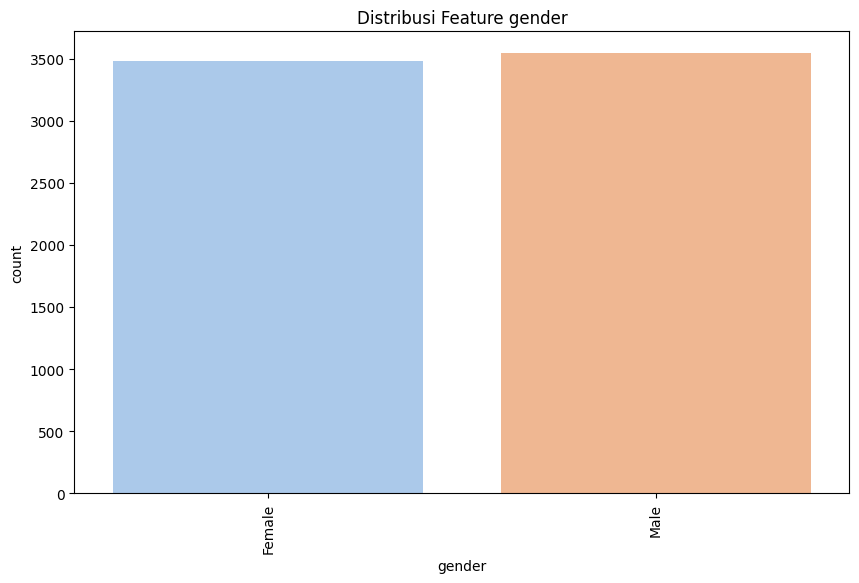

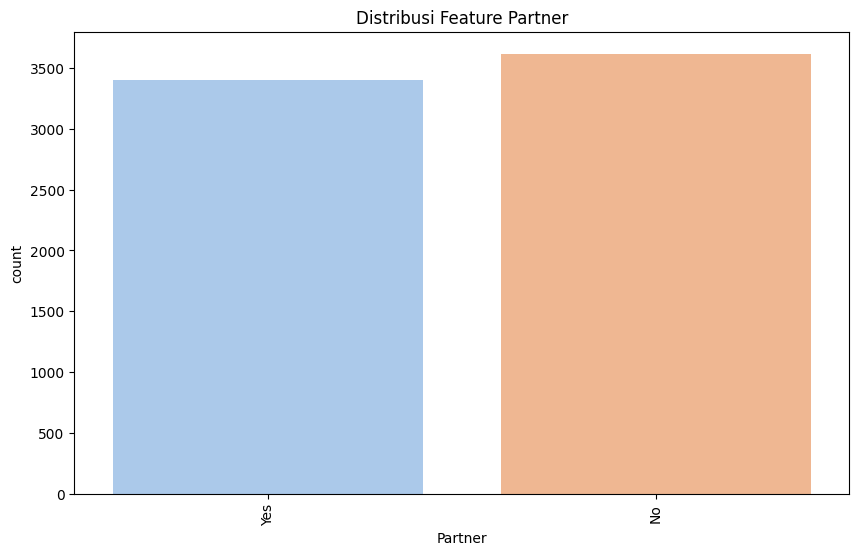

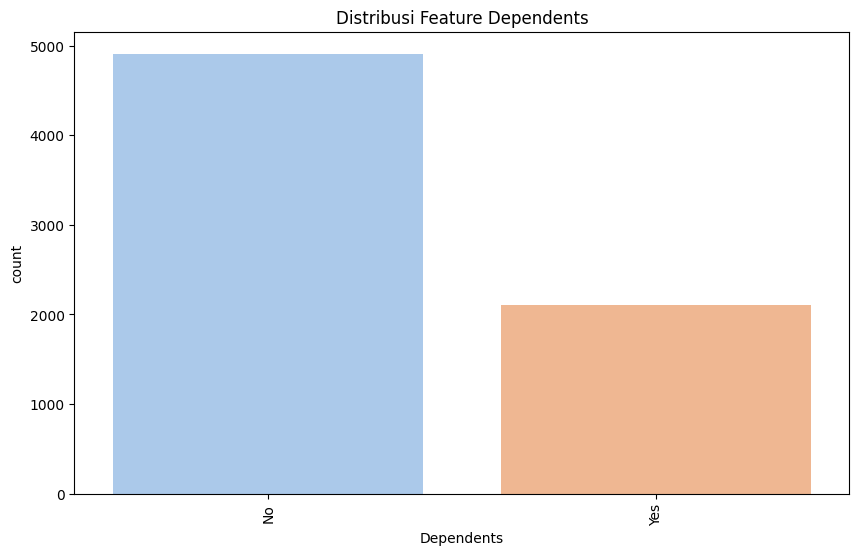

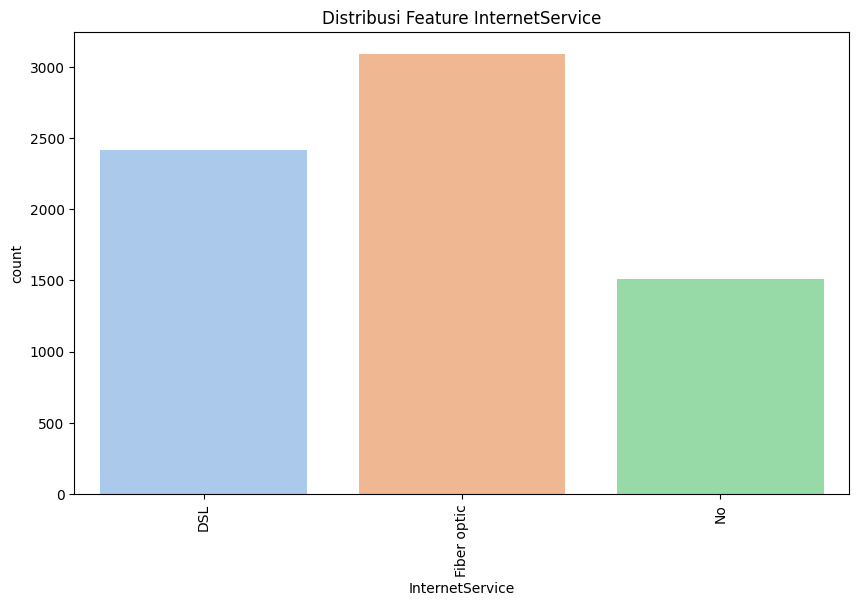

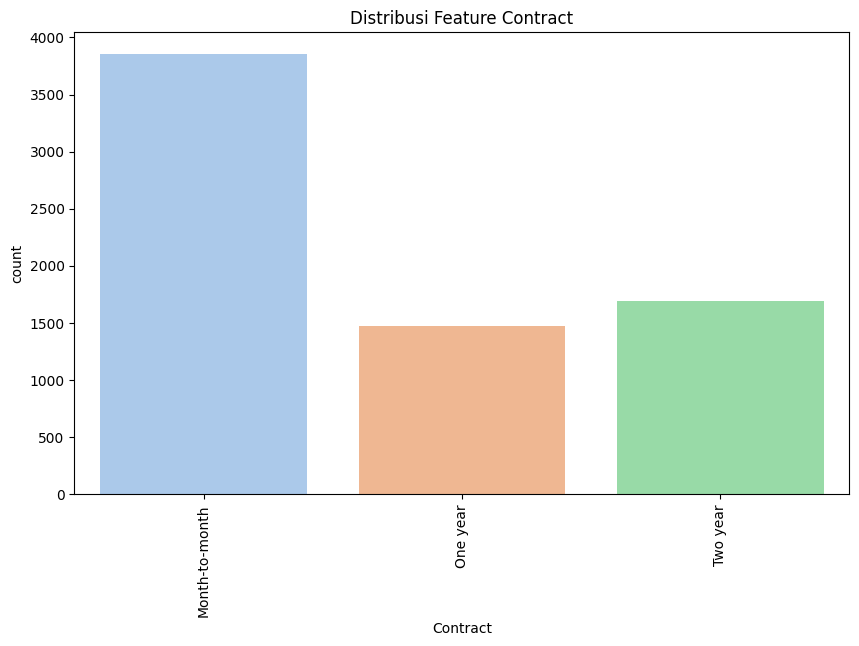

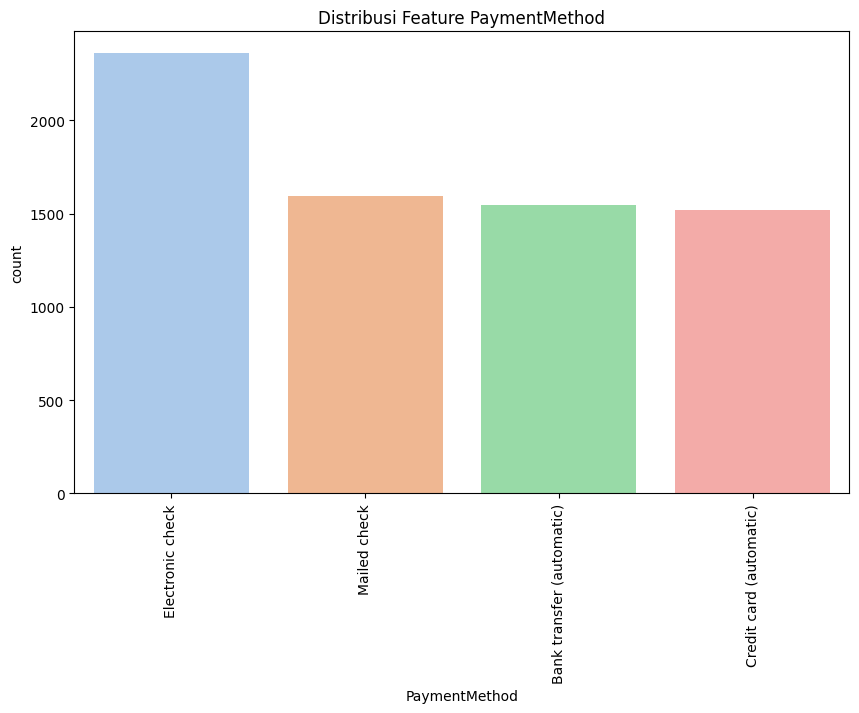

In [88]:
# Distribusi Category feature
category_feature =  ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']
for col in category_feature:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
  plt.title(f"Distribusi Feature {col}")
  plt.xticks(rotation=90)
  plt.show()

**Interpetasi** <br>
Gender: Pelanggan dengan gender male sedikit lebih banyak dibandingkan pelanggan female.

Partner: Pelanggan yang sudah menikah jumlahnya lebih sedikit, kemungkinan karena adanya banyak kebutuhan finansial sehingga mereka lebih cenderung berhenti berlangganan.

Dependents: Sebagian besar pelanggan tidak memiliki tanggungan, sehingga dari segi keuangan mereka lebih fleksibel.

Internet Service: Pelanggan yang menggunakan layanan DSL cukup banyak, namun jumlah pelanggan yang menggunakan Fiber Optic lebih besar. Sebagian kecil pelanggan tidak menggunakan layanan internet sama sekali.

Contract: Untuk jenis kontrak langganan, pelanggan cenderung memilih kontrak per bulan (Month-to-month) dibandingkan kontrak satu tahun (One year) atau dua tahun (Two year).
Jumlah pelanggan dengan kontrak One year dan Two year masing-masing berada di kisaran 1.500 hingga 1.700 orang.

Berdasarkan visualisasi di atas, pelanggan cenderung menggunakan metode pembayaran Electronic Check dibandingkan Mailed Check, Bank Transfer (automatic), dan Credit Card (automatic).
Hal ini menunjukkan bahwa pelanggan lebih nyaman menggunakan pembayaran secara online karena lebih fleksibel dan dapat dilakukan dari mana saja.

# Bivariate Analysis

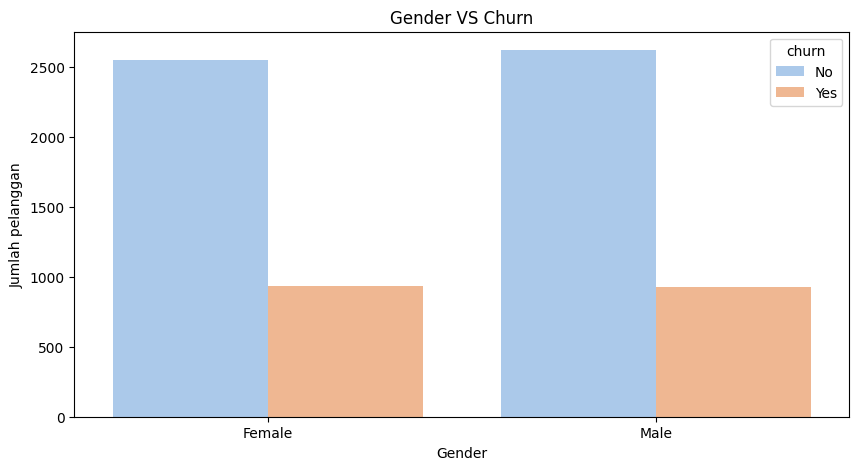

In [91]:
# Apakah pria lebih banyak churn daripada wanita
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gender', hue='Churn', palette='pastel')
plt.title('Gender VS Churn')
plt.xlabel('Gender')
plt.ylabel('Jumlah pelanggan')
plt.title('Gender VS Churn')
plt.legend(title='churn', loc='upper right')
plt.show()

**Insight**
<br>
Bedasarkan grafik di atas gender male (wanita) memiliki no churn yang tinggi jika di bandingkan dengan gender female(pria), namun perbedaanya tidak terlalu signifikan.

<ipython-input-89-89e4f71b36b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')


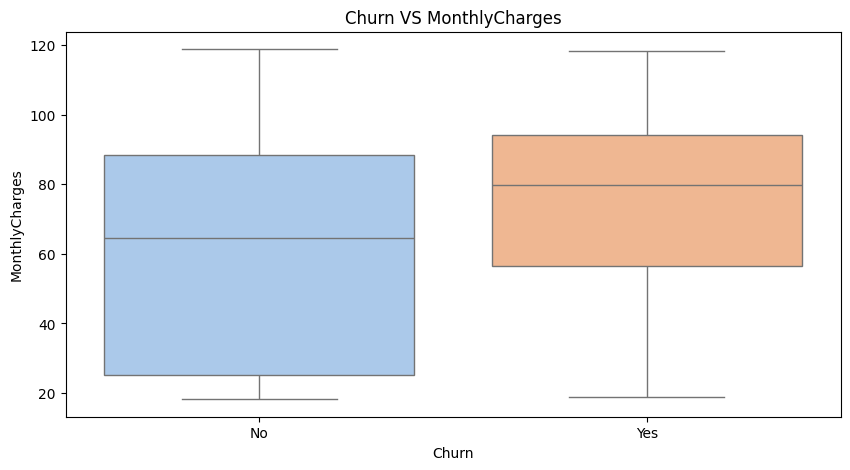

In [89]:
# churn vs MonthlyCharges(boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')
plt.title('Churn VS MonthlyCharges')
plt.show()

**Interpertasi**:
<br>
Berdasarkan grafik di atas, untuk churn perbulan:
1. Pelanggan yang churn(yes) cenderung biaya bulanannya lebih tinggi, di bandingkan dengan churn(no). ini dapat dilihat:
- Median untuk churn = yes lebih tingggi, dibanding dengan churn=NO.
- Sebagian besar nilai dalam box churn = yes juga berada dalam kisaran lebih tinggi.

2. Sebaran (distribusi) biaya bulanan untuk pelanggan churn lebih sempit, artinya pelanggan yang churn lebih sering memiliki tagihan yang lebih konsisten tinggi. Sementara pelanggan yang tidak churn memiliki sebaran yang lebih lebar(lebih variatif).

3. Kemungkinan korelasi antara biaya bulanan dan kemungkinan churn: artinya semakin tinggi biaya pelanggan tiap bulan, kemungkinan mereka untuk berhenti(churn) juga meningkat.
<br>
**Implikasi Bisnis**:
Perusahaan memungkinkan untuk mengevaluasi strategi harga, terutama pelanggan dengan biaya bulanan tinggi, misalkan menawarkan diskon, paket boundling atau peningkatan layanan, untuk mengurangi tingkat churn.

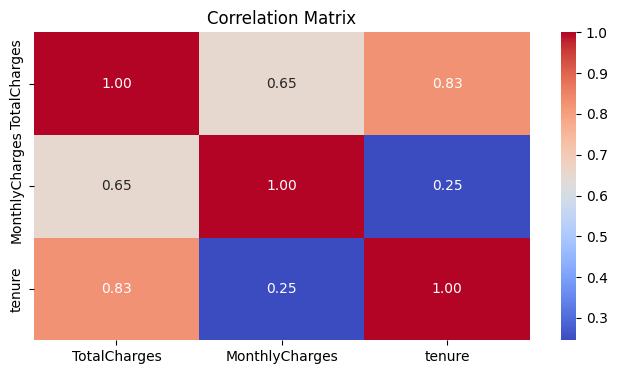

In [90]:
# Corelation matrix
cor_matrix = df[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()

# visualisasi
plt.figure(figsize=(8, 4))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Interpetasi:
- Dari berdasarkan visualisasi di atas tenure dan TotalCharges memiliki hubungan yang kuat dengan korelasi 83%, artinya makin lama berlanggan, maka total pendapatan makin besar.

# Data Preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [25]:
encoder = LabelEncoder()

numeric_list = ['feature', 'MonthlyCharges', 'TotalCharges']
for col in df.columns:
  if col not in numeric_list:
    df[col] = encoder.fit_transform(df[col])

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
df['Churn'].value_counts()

,count
Churn,
0,5164
1,1857


In [28]:
# Handel imbalanced data_frame using under_sampling
is_churn = df[df.Churn==1]
not_churn = df[df.Churn==0]

not_churn_sample = not_churn.sample(n=1857)
df = pd.concat([not_churn_sample, is_churn], axis=0)

In [29]:
df['Churn'].value_counts()

,count
Churn,
0,1857
1,1857


# Feature Selection

In [30]:
X = df.drop(columns='Churn', axis=1)
y = df['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# print shape of the dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_train: {y_test.shape}")

Shape of X_train: (2971, 19)
Shape of X_test: (743, 19)
Shape of y_train: (2971,)
Shape of y_train: (743,)


# Modeling

In [33]:
models = [
    XGBRFClassifier(n_estimators=100, learning_rate=0.1),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='rbf', C=0.1)
]

for model in models:
  cv_score = cross_val_score(model, X, y, cv=5)
  mean_score = (sum(cv_score)/len(cv_score))*100
  mean_score = round(mean_score, 2)
  print(model, ' ', cv_score)
  print(model, ' score', mean_score, '%')
  print('-'*50)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)   [0.77523553 0.7846568  0.76985195 0.76312248 0.7425876 ]
XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
  

In [34]:
xgb = XGBRFClassifier(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, ...)

In [35]:
y_pred = xgb.predict(X_test)
print("Accuracy_Score =", round((accuracy_score(y_test, y_pred)* 100), 2), '%')
print('-'*50)
print('confusion_matrix')
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('classification_report')
print(classification_report(y_test, y_pred))

Accuracy_Score = 75.37 %
--------------------------------------------------
confusion_matrix
[[275 123]
 [ 60 285]]
--------------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       398
           1       0.70      0.83      0.76       345

    accuracy                           0.75       743
   macro avg       0.76      0.76      0.75       743
weighted avg       0.76      0.75      0.75       743



# Hyperparameter

In [36]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [3, 5, 7],
    'learning_rate':[0.01, 0.1],
    'colsample_bytree':[0.5, 0.7, 1.0]
}

grid = GridSearchCV(XGBRFClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
# print("Best Score:", grid.best_score)

Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


# Implementasi hyperparameter

In [41]:
final_model = XGBRFClassifier(n_estimators=200, learning_rate=1.0, max_depth=3, colsample_bytree=0.7)
final_model.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.7, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [49]:
# Evaluasi model
y_pred = final_model.predict(X_test)
print("Accuracy=", round((accuracy_score(y_test, y_pred)* 100), 2),'x')
print('-'*50)
print('confusion_matrix')
print(confusion_matrix(y_test, y_pred))
print('-'*50)
print('classification_report')
print(classification_report(y_test, y_pred))

Accuracy= 76.04 %
--------------------------------------------------
confusion_matrix
[[286 112]
 [ 66 279]]
--------------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       398
           1       0.71      0.81      0.76       345

    accuracy                           0.76       743
   macro avg       0.76      0.76      0.76       743
weighted avg       0.77      0.76      0.76       743



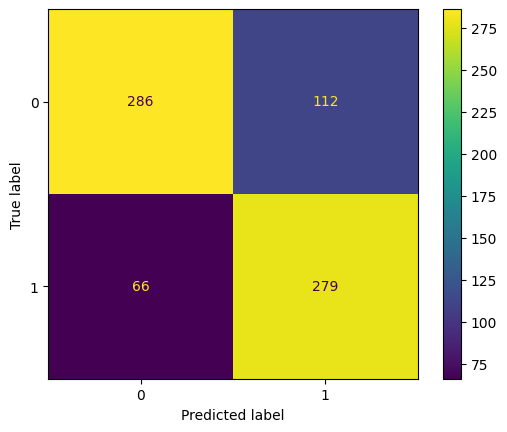

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot()

**Insight**:
<br>
- TP = Model benar dalam memperdikis kelas 1(churn) sebanyak 279.
- TN = Model benar dalam memprediksi kelas 0(no churn) sebanyak 286.
- FP: 112 model salah dalam memprediksi 1, padahal seharunya 0.
- FP: 66 model salah memprediksi 0, padahal seharusnya 1

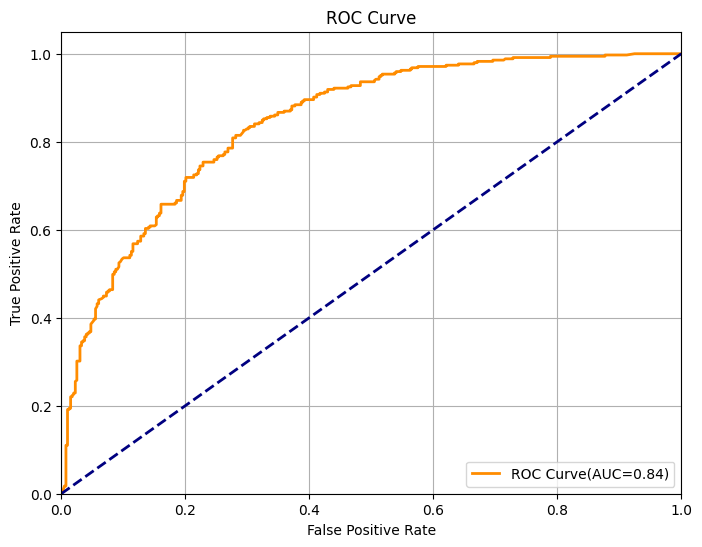

In [58]:
# Visulisasi ROC Curve dan AUC Score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prediksi Probabilitas kelas 1 (churn)
y_probs = final_model.predict_proba(X_test)[:, 1]

# hitung Roc Curve dan Auc
fpr, tpr, thresholad = roc_curve(y_test, y_probs)
roc_auc =auc(fpr, tpr)

# plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot([0,1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Dengan hasil ROC Curve 0.84 ini sangat baik, karena model mampu membedakan klasifikasi antara klas churn dan non-churn dengan sangat baik.

# Shap Anlysis

In [59]:
import shap

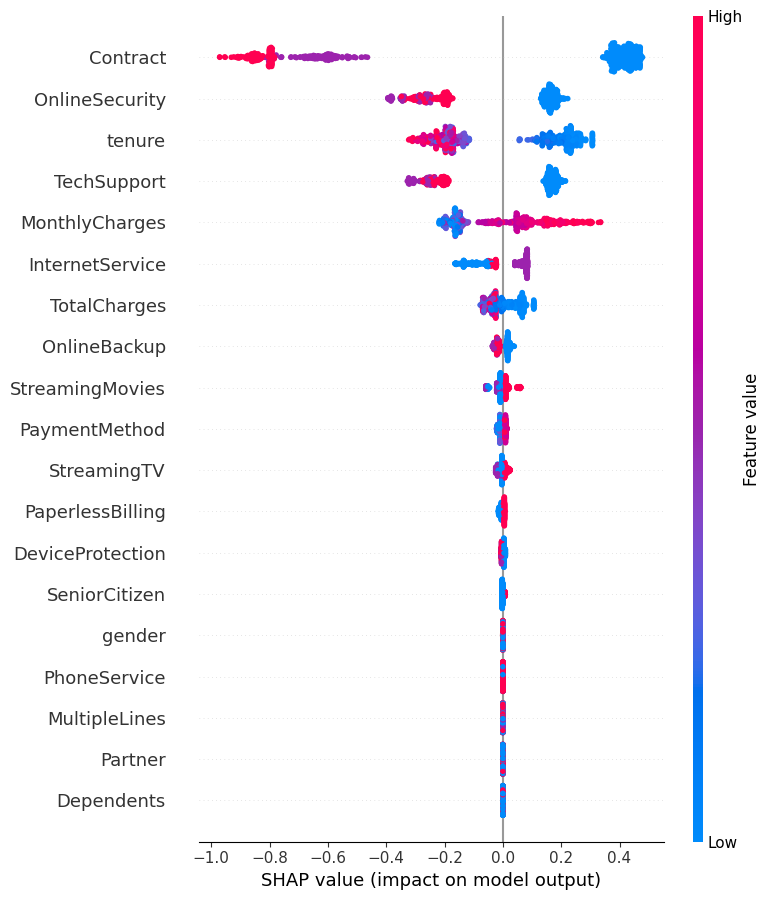

In [62]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)
# Summary plot
shap.summary_plot(shap_values, X_test)

**Insight**:
<br>
dari grafik di atas, feature-feature yang memiliki pengaruh terhadap churn yaitu:
- Contract:
<br>
Contract jangka pendek cenderung memiliki potensi churn yang tinggi, sebaliknya pelanggan yang memiliki kontrak jangka panjang pontesi churnnya cukup rendah.
- Layanan keamanan dan dukungan teknis
<br>
Pelanggan yang tidak menggunakan layanan Online security, tech support, atau online backup beresiko untuk berhenti.
- tenure
<br>
pelanggan yang baru bergabung (tenure rendah) memiliki resiko churn yang lebih tinggi.
- Monthlycharges
<br>
Pelanggan yang membayar biaya bulanan tinggi lebih cenderung meras tidak puas dan akhirnya berhenti.